In [12]:

import torch
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import torch.nn.functional as F
from torch.utils.data import DataLoader
import random
import scipy.sparse
from scipy import stats
from scipy import fftpack
from infer_pK_Kt_bytype import optimalLearningParallel

In [2]:
#Try to fit parameters of MaxEnt with TA code
#Load spikes, possibly in the form NxB
r = np.load("myspikes.npy")
#r = r.reshape(-1,r.shape[-1]).transpose()

In [4]:
#Parameters for fitting
N,B = r.shape
Bmin = B
logTd = 5
nWork=1
nStepMore = 10
eta = 5e-3

In [6]:
#COmpute summary statistics and inverse of hessian
cells_all = {}
P = []
pA = [] # mean of P
P_csr = []
for i_cell in range(N):
    cells_all[i_cell] = {}
    cells_all[i_cell]['spike_train'] = r[i_cell]
cells_clean_all = []
for i_clean in range(N):
    P_csr.append(scipy.sparse.csr_matrix(cells_all[i_clean]\
        ['spike_train']))
    pA.append(P_csr[-1].mean())
    cells_clean_all.append(i_clean)
# generating susceptibility matrix chiA (Fisher matrix)
n_cells_clean = len(cells_clean_all)            

for i_clean0 in range(N):
    for i_clean1 in range(N):
        if i_clean0 < i_clean1:#np.in1d([i_clean0, i_clean1], cells_exclude).any() == False \
            #and i_clean0 < i_clean1:
            max_len = np.amin([len(cells_all[i_clean0]['spike_train']), 
                                len(cells_all[i_clean1]['spike_train'])])
            train0 = scipy.sparse.csr_matrix(cells_all[i_clean0]\
                ['spike_train'][:max_len])
            train1 = scipy.sparse.csr_matrix(cells_all[i_clean1]\
                ['spike_train'][:max_len])
            P_csr.append(train0.multiply(train1))
            pA.append(P_csr[-1].mean())
chiA = np.zeros((len(P_csr), len(P_csr)))
chiAC = np.zeros((len(P_csr), len(P_csr))) # connected correlations
for i_chiA0 in range(len(P_csr)):
    for i_chiA1 in range(i_chiA0, len(P_csr)):
        max_len = np.amin([P_csr[i_chiA0].shape[1], P_csr[i_chiA1].shape[1]])
        arr0 = P_csr[i_chiA0][0, :max_len]
        arr1 = P_csr[i_chiA1][0, :max_len]
        chiA[i_chiA0][i_chiA1] = arr0.multiply(arr1).mean()
        chiAC[i_chiA0][i_chiA1] = chiA[i_chiA0][i_chiA1]
        # connecting 2-way correlations
#        if i_chiA0<n_cells_clean and i_chiA1<n_cells_clean:
        chiAC[i_chiA0][i_chiA1] -= pA[i_chiA0]*pA[i_chiA1]
        chiAC[i_chiA1][i_chiA0] = chiAC[i_chiA0][i_chiA1]
        chiA[i_chiA1][i_chiA0] = chiA[i_chiA0][i_chiA1]

In [6]:
#Fitting procedure
q, jList, pK_all, pK_types, pK_indep, Kt_types, raster_MC = optimalLearningParallel(\
                                                                    N, 
                                                                    B, 
                                                                    Bmin, 
                                                                    logTd, pA, chiAC, 
                                                                    eta, 1.0, 
                                                                    nStepMore, nWork, 
                                                                    labels)

n1 0 n2 1 offset 10
n1 0 n2 2 offset 11
n1 0 n2 3 offset 12
n1 0 n2 4 offset 13
n1 0 n2 5 offset 14
n1 0 n2 6 offset 15
n1 0 n2 7 offset 16
n1 0 n2 8 offset 17
n1 0 n2 9 offset 18
n1 1 n2 2 offset 19
n1 1 n2 3 offset 20
n1 1 n2 4 offset 21
n1 1 n2 5 offset 22
n1 1 n2 6 offset 23
n1 1 n2 7 offset 24
n1 1 n2 8 offset 25
n1 1 n2 9 offset 26
n1 2 n2 3 offset 27
n1 2 n2 4 offset 28
n1 2 n2 5 offset 29
n1 2 n2 6 offset 30
n1 2 n2 7 offset 31
n1 2 n2 8 offset 32
n1 2 n2 9 offset 33
n1 3 n2 4 offset 34
n1 3 n2 5 offset 35
n1 3 n2 6 offset 36
n1 3 n2 7 offset 37
n1 3 n2 8 offset 38
n1 3 n2 9 offset 39
n1 4 n2 5 offset 40
n1 4 n2 6 offset 41
n1 4 n2 7 offset 42
n1 4 n2 8 offset 43
n1 4 n2 9 offset 44
n1 5 n2 6 offset 45
n1 5 n2 7 offset 46
n1 5 n2 8 offset 47
n1 5 n2 9 offset 48
n1 6 n2 7 offset 49
n1 6 n2 8 offset 50
n1 6 n2 9 offset 51
n1 7 n2 8 offset 52
n1 7 n2 9 offset 53
n1 8 n2 9 offset 54
[2.1708e-01 3.6214e-01 2.6719e-01 1.1384e-01 3.2500e-02 6.4300e-03
 7.8000e-04 4.0000e-05 0.0000e+00

In [21]:
tri = np.zeros((N,N))
tri[np.triu_indices(N, 1)] = jList[N:]

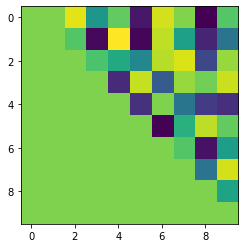

In [23]:
plt.imshow(tri)

In [9]:
len(pA)

55

In [11]:
chiAC.shape

(55, 55)